## import local

In [1]:
from __future__ import print_function
__file__ = !cd .. ;pwd
__file__ = __file__[0]
__file__

'/Users/brucecottman/Documents/PROJECTS/paso'

In [2]:
import sys
from random import random
import pandas as pd
sys.path.append(__file__)
sys.path

['/Users/brucecottman/Documents/PROJECTS/paso/lessons',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python37.zip',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/lib-dynload',
 '',
 '/Users/brucecottman/.local/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/aeosa',
 '/Users/brucecottman/anaconda3/envs/paso/lib/python3.7/site-packages/IPython/extensions',
 '/Users/brucecottman/.ipython',
 '/Users/brucecottman/Documents/PROJECTS/paso']

In [3]:
from paso.base import Paso,Log,PasoError,Param,NameToClass
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()



paso 15.7.2019 15:38:36 INFO Log started
paso 15.7.2019 15:38:36 INFO ========================================
paso 15.7.2019 15:38:36 INFO Read in parameter file: ../parameters/lesson.3.yaml


## Balancing and  Augmentating Class Stratified Data

Structured Data Augmentation is very rarely discussed in theoretical or real-world production systems. It a secret sauce for which the recipe will be shown here. Along the way, we will introduce ``paso's`` Class Balancing tools. As was shown in the previous two articles, **paso** supports and is compatiable with ``sklearn``.



## A Quick Overview of paso

**paso** is a package written in Python and some ``C``(for speed) that was originally intended to bundle best-practices and state-of-the-art services, classes and functions for the Machine Learning and Deep Learning community. **paso** has grown beyond this to offer patterns, classes and methods you can use in your **Scikit-Learn pipelines** or custom code with or without adopting the entire **paso** package.

**Scikit-Learn pipelines** are composed of steps, each step has to be **Scikit-Learn transformer** or a custom **Scikit-Learn transformer**. The last of the pipeline can be a transformer or an estimator, where a **Scikit-Learn estimator** is a compatible model. 

**paso** has quite a few Class Balancing transformers that are custom **Scikit-Learn transformers**. Note that **paso** translates from Spanish to English to the word step.

Discussion will be divided into the following major segments:
- What Class Balancing stratagems are in **paso**.
- How to use Class Balancing to argument Fixed Structure data
- The benefits of argumenting Fixed Structure data.
- As usual the source code for all examples is available.

As we saw in [lesson-1](), we need to startup **paso** services.

In [4]:
import numpy as np
import pandas as pd
from pandas_summary import DataFrameSummary

import warnings
warnings.filterwarnings("ignore")
import multiprocessing

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import seaborn as sns
color = sns.color_palette()

from paso.base import Paso,Log,PasoError
from loguru import logger
session = Paso(parameters_filepath='../parameters/lesson.3.yaml').startup()

paso 15.7.2019 15:38:36 INFO ========================================
paso 15.7.2019 15:38:36 INFO Read in parameter file: ../parameters/lesson.3.yaml


In [5]:
from paso.base import _isAttribute
class foo(object):
    def __init__(self):
        self.x = 1
    def check(self,name_variable_string):
        self.x = 1
        return (_isAttribute(self, name_variable_string))
foo().check('y')

False

## paso Class for Handling Imbalanced Classes

All available class balance strategies are shown with:

In [6]:
from paso.pre.cleaners import Class_Balance
o = Class_Balance('SMOTE')
o.classBalancers()

['RanZOverSample',
 'SMOTE',
 'ADASYN:',
 'BorderLineSMOTE',
 'SVMSMOTE',
 'SMOTENC',
 'RandomUnderSample',
 'ClusterCentroids',
 'NearMiss',
 'EditedNearestNeighbour',
 'RepeatedEditedNearestNeighbours',
 'CondensedNearestNeighbour',
 'OneSidedSelection']

## Balance Toy Example Classes

Let us start with a toy dataset to class balance. we load the ``iris``data set, into the ``Flower``dataframe.  The feature ``TypeOf`` will contain the class target values.

In [7]:
from paso.pre.inputers import Inputer
Inputer().inputers()

['exec', 'cvs', 'xls', 'xlsm', 'text', 'image2D', 'image3D']

In [8]:
 Flower = Inputer().transform(ontology_filepath='../parameters/dataset-iris.yaml')

paso 15.7.2019 15:38:36 DEBUG ['from sklearn.datasets import load_iris', 'iris = load_iris()']
paso 15.7.2019 15:38:36 DEBUG pd.DataFrame(iris.data, columns = iris.feature_names )


In [9]:
type(Flower['TypeOf'])

pandas.core.series.Series

In [10]:
DataFrameSummary(Flower).summary()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TypeOf
count,150,150,150,150,150
mean,5.84333,3.05733,3.758,1.19933,1
std,0.828066,0.435866,1.7653,0.762238,0.819232
min,4.3,2,1,0.1,0
25%,5.1,2.8,1.6,0.3,0
50%,5.8,3,4.35,1.3,1
75%,6.4,3.3,5.1,1.8,2
max,7.9,4.4,6.9,2.5,2
counts,150,150,150,150,150
uniques,35,23,43,22,3


In [11]:
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Class_Balance(Class_BalancerKey).transform(Flower,targetFeature)

In [12]:
DataFrameSummary(X).summary()

,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm),TypeOf
count,150,150,150,150,150
mean,3.758,1.19933,5.84333,3.05733,1
std,1.7653,0.762238,0.828066,0.435866,0.819232
min,1,0.1,4.3,2,0
25%,1.6,0.3,5.1,2.8,0
50%,4.35,1.3,5.8,3,1
75%,5.1,1.8,6.4,3.3,2
max,6.9,2.5,7.9,4.4,2
counts,150,150,150,150,150
uniques,43,22,35,23,3


``Class_Balance`` did not change the ``Flower`` dataframe as the ``iris``dataset comes class balanced.  Because the population of each of the Iris classes is about the same, the accuracy and the F1-score are almost equal.

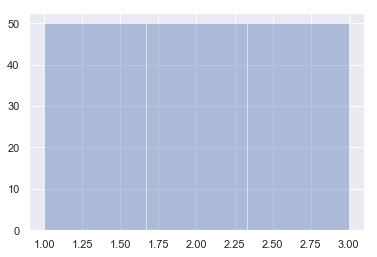

In [13]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot((X['TypeOf'].astype('category').cat.codes.astype('int')+1),kde=False)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [15]:
from paso.models.learner import Learner
o = Learner(ontological_file_path='../parameters/learner-RandomForestClassification.yaml')
o.train(X)

NameError: name 'pasoDecoratorsnarg' is not defined

The argument ratio is the amount of the dataset to assign to the validation (test) dataset. In this case,
``X``and ``y`` datasets into training set(75\%) and validation set(25\%). Train and predict using ``RanadomForestClassifier``.

In [ ]:
o.metric_valid

Overall, very good scores using ``RandomForestClassifier``.  The following is ``confusion_matrix``of ``averaging_rounds = 100`` separate runs that averaged the results of ``RandomForestClassifier``.

## Augment the ``iris``dataset.

Now we can augment (increase by 10\% the amount data) with  synthetic data generated by a claas imbalence scheme,  ``SMOOT``. Just ``TypeOf=0`` needs 15(10%) rows (3 classes of 5 rows) of synthetic data to balance the classes. The result is similar to image augmention in that we accomplished structured data augmentation by increasing the row count ``Isis``dataset with synthetic data.

In [ ]:
from paso.pre.cleaners import Augment_by_Class
ratio = 0.1
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(Flower,targetFeature,0.1)
DataFrameSummary(X).summary()

Notice the ``mean``, ``std`` and other statistics have slightly changed. Also, the count has inreased by 10% or augmented a structured dataset by 10%. Why do expect slight and not large change in the dataset statistics?

### A small aside on cross-validation and classification train/predict model

In an future lesson, I will cover in detail how to use **paso**'s cross-validation and models that can train and then predict. In the meantime, you can find a good [overview of cross-validation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and a [detailed discussion of cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics).

In this lesson, we use **repeated random sub-sampling** This is hopefully a good choice for the class stratified datasets we will be using.
Similar to K-Fold, we set a value for K which signifies the number of times we will train our model. However, in this case K will not represent the number of equally sized partitions.
Instead, on each training iteration, we randomly select points to be for the testing set. The number of points we select will be a certain percentage we set for the testing set. For example, if we select 15%, then on each training iteration we will randomly select 15% of the points in our dataset to be set aside for training.

## Using the RandomForest model

In [ ]:
o = SkModel()
o.train(X)

In [ ]:
o.metric_valid

Hmmm, did not seem to do much. Let us try 100% augmentation or double the number of rows the  ``Flower`` dataframe.

In [ ]:
ratio = 1.00
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(Flower,targetFeature,ratio)
DataFrameSummary(X).summary()

In [ ]:
o = SkModel()
o.train(X)

In [ ]:
o.metric_valid

It seems to be more accurate in predicting the holdout (test) dataset.

Seemed to raise the accuracy by 0.024. Not bad, in both the real-world and the **Kaggle** world this is huge!

In [ ]:
ratio = 1.00
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(X,targetFeature,ratio)
DataFrameSummary(X).summary()

In [ ]:
o = SkModel()
o.train(X)

In [ ]:
o.metric_valid

Seemed to raise the accuracy by 0.014 or .039 by quadrupling.

In [ ]:
ratio = 1.00
targetFeature = 'TypeOf'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(X,targetFeature,ratio)
DataFrameSummary(X).summary()

In [ ]:
o = SkModel()
o.train(X)

In [ ]:
o.metric_valid

## Non-trivial class balancing

Let us rebalance and augment a larger dataset. [You can get ``otto_group``here.](https://www.kaggle.com/c/otto-group-product-classification-challenge/data). In this dataset we have about 62,000 rows and 8 different classes.

In [ ]:
otto_group_train = pd.read_csv("otto-group/train.csv")
DataFrameSummary(otto_group_train).summary()

The ``otto_group_train`` has a few majority(1,5) and minority classes(0,3,4.6).It is an unbalanced dataset.

In [ ]:
otto_group_train['target'] = otto_group_train['target'].astype('category').cat.codes
sns.set_color_codes()
sns.distplot(otto_group_train['target'],kde=False)

In [ ]:
otto_group_train[['id','target']].groupby(['target']).count()

epochs = 10
targetFeature = 'target'
y_test,y_pred,accuracy = RF(otto_group_train,targetFeature,ratio,epochs)

print(len(y_test))
confusion_matrix(y_test, y_pred)

 What happens when we class balance ``otto_group_train`` dataset ?

In [ ]:
ratio = 0.0
targetFeature = 'target'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(otto_group_train,targetFeature,ratio)
DataFrameSummary(X).summary()

We can use ``Augment_by_Class`` to balance ``otto_group_train``by augmenting by 0%.

epochs = 10
y_test,y_pred,accuracy = RF(X,targetFeature,ratio,epochs)

print(len(y_test))
confusion_matrix(y_test, y_pred)

In [ ]:
ratio = 1.00
targetFeature = 'target'
Class_BalancerKey = 'SMOTE'
X = Augment_by_Class(Class_BalancerKey).transform(X,targetFeature,ratio)
DataFrameSummary(X).summary()

epochs = 10
y_test,y_pred,accuracy = RF(X,targetFeature,ratio,epochs)

print(len(y_test))
confusion_matrix(y_test, y_pred)

Wait, maybe the accuracy is even better. We tripled the size of the dataset while also increasing the accuracy. What happens to a balanced ``otto_group_train`` dataset that is the same size as the original ``otto_group_train`` dataset?

## Summary

In summary paso data cleaning transformation classes are:
- ``Impute_Features_by_Values``

You have seen **paso** offers data cleaning classes for both production data engineers and research data scientists. **paso** support streaming data as well as bulk extraction data cleaning. You can expect **paso** to continue to offer state-of-the-art tools for data cleaning.

Other lessons on **paso** are:
1. [**paso**'s Offering of Logging and Parameter Services for your Python Project](https://github.com/bcottman/paso/blob/master/lessons/lesson_1.ipynb)
1. [**paso**'s Offering of Data Cleaners for your Machine or Deep Learning Projects](https://github.com/bcottman/paso/blob/master/lessons/lesson_2.ipynb)

In the future, we will cover **paso** in more depth with the following lesons:
- Overview of **paso** scalers and handling data outliers.
- Overview of **paso** encoders.
- Overview of **paso** machine learning and deep learning models.
- Using  **paso** on GPUs.
- and yet more…

If you have a service or feature or see a bug, then leave the **paso** project a [note](https://github.com/bcottman/paso/issues).